In [1]:
import os
import random
import matplotlib.pyplot as plt
import networkx as nx
from sympy import *
import numpy as np

from qiskit import QuantumCircuit, Aer, execute, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import array_to_latex

In [2]:
path = os.getcwd()
print(path)

/home/rkrd/Documents/Python/Quantum Lab Codes


In [3]:
print('Enter the dimension of the cubelike graph')
n = int(input())
N=2**n
print('Enter the size of the generating set')
d = int(input())
print('Enter the elements (positive integers) and weights of the generating set')
Weight = []
Gen_set = []
for i in range(d):
    x,y = input().split()
    Gen_set.append(int(x))
    Weight.append(int(y))
#Gen_set = [int(input()) for x in range(d)]
Gen_bin = []
for x in Gen_set:
    Gen_bin += [[int(i) for i in str(bin(x)[2:].zfill(n))]]
print('Gen set in integer forms ',Gen_set)
print('Gen set weights ',Weight)
print('Generating set ',Gen_bin)

### calculate target
target = [0]*n
for i in range(n): #runs over bits of target, careful to read from right to left
    k = 2**i
    b_k = [int(y) for y in bin(k)[2:].zfill(n)]
    s=0 #sum over z_l
    for j in range(d):
        l = Gen_set[j]
        b_l = [int(y) for y in bin(l)[2:].zfill(n)]
        if np.dot(b_k,b_l)%2 == 1:
            s += Weight[j]
    if s%2 == 1:
        target[n-i-1] = 1
print('Target = ',target)
Target = 0 #get integer form of target
for i in range(n):
    Target += target[n-i-1]*2**i
print('Target = ',Target)

Enter the dimension of the cubelike graph
2
Enter the size of the generating set
2
Enter the elements (positive integers) and weights of the generating set
1 1
2 1
Gen set in integer forms  [1, 2]
Gen set weights  [1, 1]
Generating set  [[0, 1], [1, 0]]
Target =  [1, 1]
Target =  3


Enter time t
pi/2
Enter figure number
1


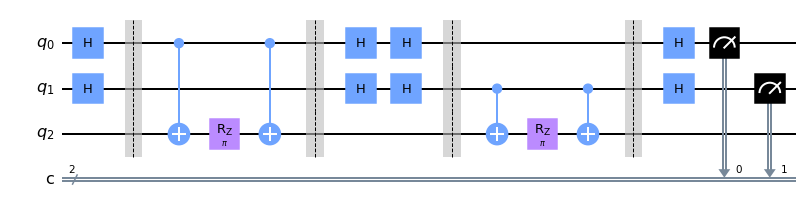

In [6]:
qc = QuantumCircuit(n+1,n)
print('Enter time t')
t = input()
t = float(simplify(t).evalf())

for j in range(d):
    x=Gen_bin[j]
    w=Weight[j]
    qc.h(range(n))
    qc.barrier()
    for i in range(n):
        if x[i]==1:
            qc.cx(n-i-1,n)
    qc.rz(2*t*w,n)
    for i in range(n):
        if x[i]==1:
            qc.cx(n-i-1,n)
    qc.barrier()
    qc.h(range(n))
   
    
for i in range(n):
    qc.measure(i,i)

print('Enter figure number')
num = int(input())
qc.draw('mpl')

In [ ]:
qc.draw(filename=path+'/Figures/'+'Fig_'+str(num),output='mpl')

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
plot_histogram(counts,title='Simulated result').savefig(path+'/Figures/'+'Fig'+str(num)+'.png')

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    print(backend)

In [ ]:
qcomp = provider.get_backend('ibmq_manila')
job = execute(qc,backend=qcomp)
job_monitor(job)

In [ ]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
plot_histogram(counts,title='Experimental result').savefig(path+'/Figures/'+'Fig'+str(num+1)+'.png')